In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy, scipy as sklearn, librosa, urllib
import librosa.display
from IPython.display import Audio
import json 
import seaborn as sns
from sklearn.cluster import KMeans
import csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
import keras
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from os import path

from itertools import cycle
from sklearn.manifold import TSNE
from sklearn.metrics import roc_curve, auc, silhouette_score,roc_auc_score, precision_recall_fscore_support
from tqdm import tqdm
import opensmile


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras import regularizers
from joblib import dump, load

import scipy.stats as st
import random

from tensorflow.keras.datasets import mnist


In [14]:
clear_df = pd.read_pickle("../utils/data/clear_functional.pkl")
# clear_df = pd.read_pickle("../utils/data/clear_functional_emovo.pkl")

# clear_df = pd.read_pickle("pitch_functional_demos.pkl")
# clear_df = pd.read_pickle("pitch_functional_emovo.pkl")

labels = clear_df["label"].unique()
labels

array(['neutral', 'guilt', 'disgust', 'happiness', 'fear', 'anger',
       'surprise', 'sadness'], dtype=object)

In [15]:
import pickle
with open('../utils/data/data_train_opt_demos.pkl', 'rb') as handle:
    data_train = pickle.load(handle)



with open('../utils/data/data_test_opt_demos.pkl', 'rb') as handle:
    data_test = pickle.load(handle)


emo = data_train
emo_test = data_test
# data_train = np.array(train_errors)
# data_test = np.array(test_errors)


8

In [21]:
emo = []

for i in range(0,data_train.shape[0],70):
    emo.append(data_train[i:i+70])

emo_test = []

for i in range(0,data_test.shape[0],14):
    emo_test.append(data_test[i:i+14])

# Distribuzione Errori

In [6]:
means = np.mean(emo[0], axis=0)
stds = np.std(emo[0],axis=0)

cov_matrix = np.diag(stds**2)  

samples = np.random.multivariate_normal(means, cov_matrix, size=20)

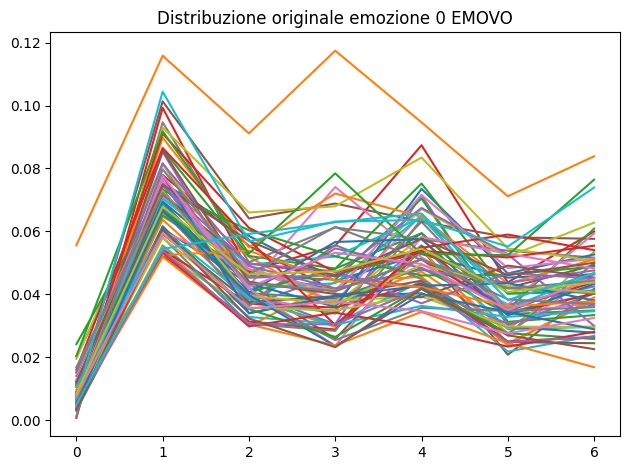

In [6]:
for i in range(len(emo[1])):
    plt.plot(emo[0][i])
plt.title("Distribuzione originale emozione 0 EMOVO")
plt.tight_layout()
plt.savefig("EMOVO_EMO_0_train.png")

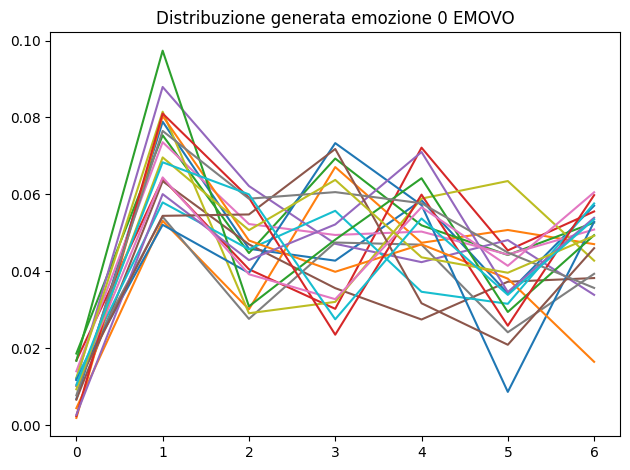

In [7]:
for i in range(len(samples)):
    plt.plot(samples[i])
plt.title("Distribuzione generata emozione 0 EMOVO")
plt.tight_layout()
plt.savefig("EMOVO_EMO_0_gen.png")

# Mahalhanobis Distance

In [16]:
from scipy import linalg
def mahal(X,Y):
    if len(X.shape) < 2:
        X = X.reshape(-1,1)
    if len(Y.shape) < 2:
        Y = Y.reshape(-1,1)

    [rx,cx] = X.shape
    [ry,cy] = Y.shape

    m = np.mean(X)
    M = m*(np.ones((ry,1)))
    C = X - m*(np.ones((rx,1)))
    [Q,R] = linalg.qr(C, mode= "economic")
    ri = np.linalg.solve(R.T, (Y - M).T) # ri = R.T/(Y-M).T
    d = (sum(ri*ri).T)*(rx-1)

    return d

In [33]:
for i in range(data_train.shape[-1]):
    X = data_train[:,i]
    Y = emo_test[0][0][0]
    print(mahal(X,Y))

[17.4349426]
[4.19115027]
[14.47981636]
[9.06280825]
[6.04785387]
[20.38073462]
[7.16048355]


In [67]:
for i in range(data_train.shape[-1]):
    X = emo[i][:,i]
    Y = emo_test[0][0][0]
    print(mahal(X,Y))

[178.29101095]
[179.02932938]
[203.38550206]
[271.91121615]
[226.48869279]
[167.40096391]
[158.19698341]


In [61]:
for i in range(data_train.shape[-1]):
    X = np.mean(emo[0],axis=0)
    Y = emo_test[0][0]
    print(mahal(X,Y))

[11.29359257 12.70905946 21.71029666 19.01433354  8.25208432  8.928096
 12.44321691]
[11.29359257 12.70905946 21.71029666 19.01433354  8.25208432  8.928096
 12.44321691]
[11.29359257 12.70905946 21.71029666 19.01433354  8.25208432  8.928096
 12.44321691]
[11.29359257 12.70905946 21.71029666 19.01433354  8.25208432  8.928096
 12.44321691]
[11.29359257 12.70905946 21.71029666 19.01433354  8.25208432  8.928096
 12.44321691]
[11.29359257 12.70905946 21.71029666 19.01433354  8.25208432  8.928096
 12.44321691]
[11.29359257 12.70905946 21.71029666 19.01433354  8.25208432  8.928096
 12.44321691]


In [79]:
from scipy import stats
for i in range(emo[0].shape[-1]):
    print(stats.ttest_ind(emo[0][:,0], emo[0][:,i]))


# stats.ttest_ind(emo[0][:,0], emo[0][:,2])
# stats.ttest_ind(emo[0][:,0], emo[0][:,3])
# stats.ttest_ind(emo[0][:,0], emo[0][:,4])
# stats.ttest_ind(emo[0][:,0], emo[0][:,5])
# stats.ttest_ind(emo[0][:,0], emo[0][:,6])


TtestResult(statistic=0.0, pvalue=1.0, df=138.0)
TtestResult(statistic=-33.65964318935811, pvalue=2.0993225736518523e-68, df=138.0)
TtestResult(statistic=-23.08441011733788, pvalue=3.112700444883019e-49, df=138.0)
TtestResult(statistic=-16.862254927638002, pvalue=2.494062716002767e-35, df=138.0)
TtestResult(statistic=-25.04780672814777, pvalue=3.4462652853281057e-53, df=138.0)
TtestResult(statistic=-18.66961041355545, pvalue=1.38681132597987e-39, df=138.0)
TtestResult(statistic=-19.598872218320395, pvalue=1.0531840955269719e-41, df=138.0)


# BOXPLOTS

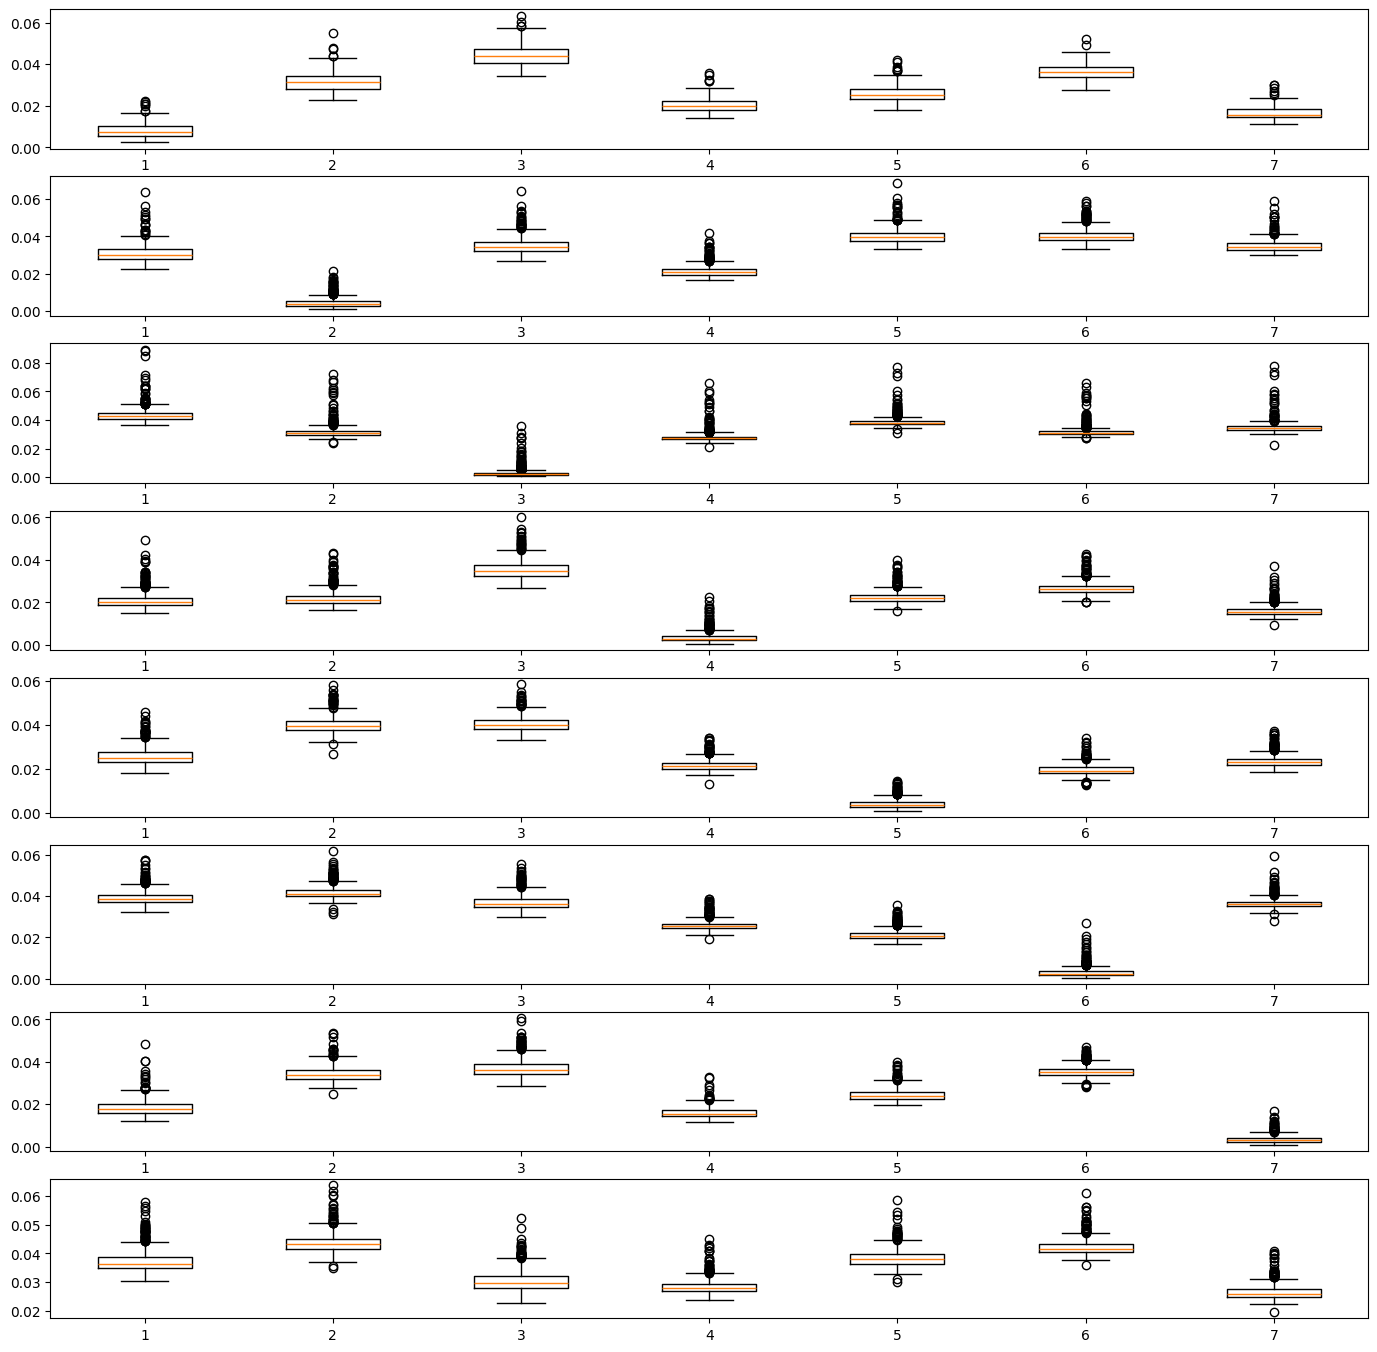

In [21]:
n_rows = len(emo)
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize=(17,17))
# for x in range(n_rows):
for i in range(len(emo)):
# Crea i boxplot
    # totale = np.concatenate((data_train[:, :i], data_train[:, i:]), axis=1)

    axes[i].boxplot([emo[i][:,0], emo[i][:,1],emo[i][:,2],emo[i][:,3],emo[i][:,4],emo[i][:,5],emo[i][:,6]])
    # axes[i].set_yscale('log')
        # axes[x,i].set_title(f"{labels[i]}")
# fig.suptitle("Train")

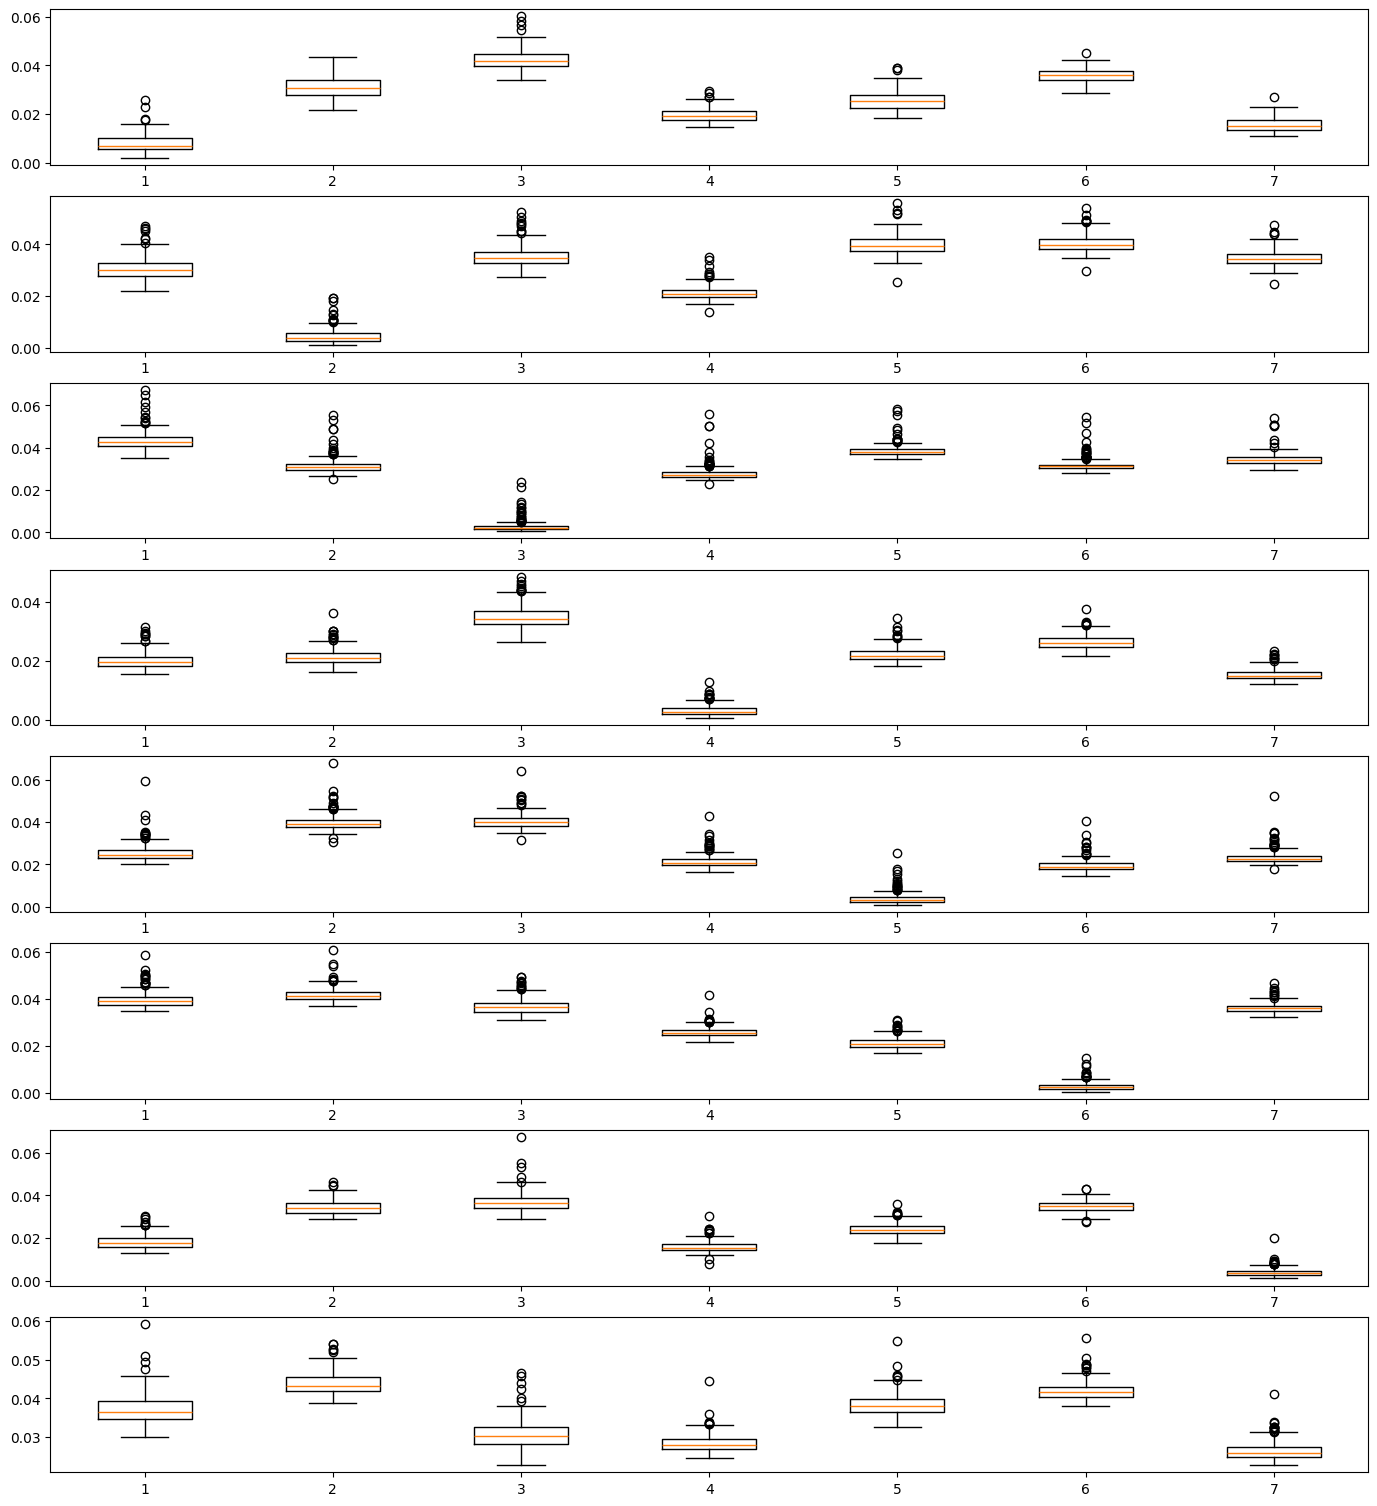

In [22]:
n_rows = len(emo_test)
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize=(17,19))
# for x in range(n_rows):
for i in range(len(emo_test)):
# Crea i boxplot
    # totale = np.concatenate((data_train[:, :i], data_train[:, i:]), axis=1)
    axes[i].boxplot([emo_test[i][:,0], emo_test[i][:,1],emo_test[i][:,2],emo_test[i][:,3],emo_test[i][:,4],emo_test[i][:,5],emo_test[i][:,6]])
    # axes[i].set_title(f"{labels[i]}")
        # axes[x,i].set_title(f"{labels[i]}")
# fig.suptitle("Test")

# plt.savefig("OvA_EMOVO_test.png")